# 线性回归
这里我们会介绍一个简单的线性回归模型。这个模型形式如下：
$$ y = Ax + b$$
其中$x \in R^n, A \in R^{m \times n}, b \in R^m, y \in R^m$

我们假设输入x和输出y之间是线性的关系，根据训练数据集合X和Y来学习出最优的参数A和b。

## 1. 准备数据
这里我们使用生成的数据，为了简单，我们这里假设x和y都是一维的实数。生成数据的方式是用”真实“（我们期望模型学习的）的数据加上随机的高斯噪声。

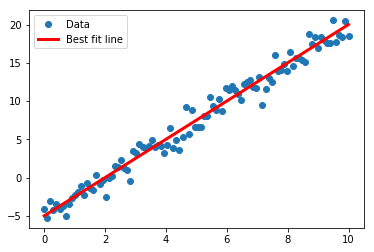

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
x_vals = np.linspace(0, 10, 100)
realA = 2.5
realb = -5
y_reals = realA * x_vals + realb
y_vals = y_reals + np.random.normal(0, 1, 100)


# Plot the results
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, y_reals, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

## 2. SGD训练
$$\hat{y_i}=Ax_i+b $$
$$L(\hat{y_i}, y_i)=\frac{1}{2}\sum_i{(\hat{y_i}-y_i)}^2 $$
$$\frac{dL}{dA}=\sum_i (\hat{y_i}-y_i) x_i$$
$$\frac{dL}{db}=\sum_i (\hat{y_i}-y_i)$$

In [2]:
A=np.random.normal(0,1)
b=0
print("init A={0}, b={1}".format(A, b))

epochs=1000
losses = []
batch_size=10
learning_rate=0.001
for i in range(epochs):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = y_vals[rand_index]
    #forward
    pred_y=A*rand_x+b
    loss=np.sum((pred_y - rand_y)*(pred_y - rand_y))/2
    losses.append(loss)
    dLdA=np.sum((pred_y - rand_y)*rand_x)
    dLdb=np.sum(pred_y - rand_y)
    A=A-learning_rate*dLdA
    b=b-learning_rate*dLdb

print("final A={0}, b={1}".format(A, b))

init A=-0.8910765590338519, b=0
final A=2.4550713790649468, b=-4.509023674759437


## 3. 结果显示

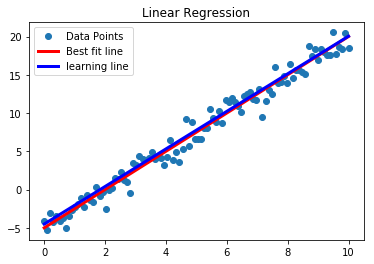

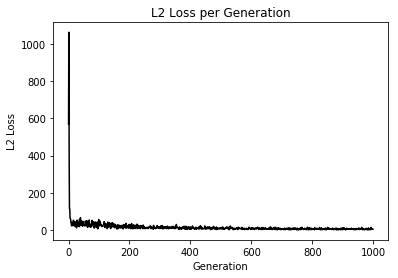

In [3]:

# Plot the result
y_pred=A*x_vals+b
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, y_reals, 'r-', label='Best fit line', linewidth=3)
plt.plot(x_vals, y_pred, 'b-', label='learning line', linewidth=3)

plt.legend(loc='upper left')
plt.title('Linear Regression')
plt.show()

# Plot loss over time
plt.plot(losses, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()
